## Pytorch tutorial on functions Approximation 

Epoch 100/20000, Loss: 209.9583
Epoch 200/20000, Loss: 144.6602
Epoch 300/20000, Loss: 100.7025
Epoch 400/20000, Loss: 71.0352
Epoch 500/20000, Loss: 50.9785
Epoch 600/20000, Loss: 37.4031
Epoch 700/20000, Loss: 28.2069
Epoch 800/20000, Loss: 21.9732
Epoch 900/20000, Loss: 17.7457
Epoch 1000/20000, Loss: 14.8779
Epoch 1100/20000, Loss: 12.9318
Epoch 1200/20000, Loss: 11.6109
Epoch 1300/20000, Loss: 10.7143
Epoch 1400/20000, Loss: 10.1055
Epoch 1500/20000, Loss: 9.6921
Epoch 1600/20000, Loss: 9.4114
Epoch 1700/20000, Loss: 9.2207
Epoch 1800/20000, Loss: 9.0913
Epoch 1900/20000, Loss: 9.0034
Epoch 2000/20000, Loss: 8.9436
Epoch 2100/20000, Loss: 8.9031
Epoch 2200/20000, Loss: 8.8755
Epoch 2300/20000, Loss: 8.8568
Epoch 2400/20000, Loss: 8.8441
Epoch 2500/20000, Loss: 8.8355
Epoch 2600/20000, Loss: 8.8296
Epoch 2700/20000, Loss: 8.8256
Epoch 2800/20000, Loss: 8.8229
Epoch 2900/20000, Loss: 8.8211
Epoch 3000/20000, Loss: 8.8198
Epoch 3100/20000, Loss: 8.8190
Epoch 3200/20000, Loss: 8.8184


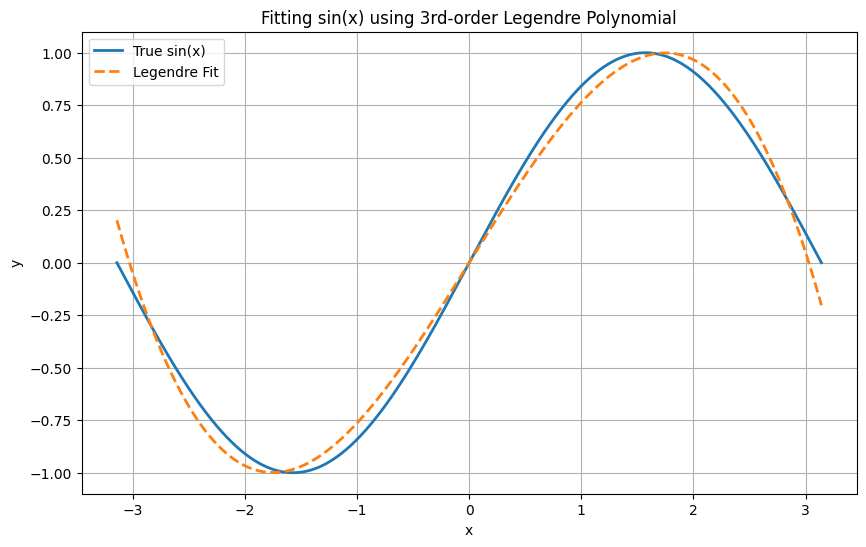

In [4]:
import torch
import math
import matplotlib.pyplot as plt


class LegendrePolynomial3(torch.autograd.Function):
    """
    Custom autograd Function implementing the 3rd-order Legendre polynomial:
        P3(x) = 0.5 * (5x^3 - 3x)
    """

    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return 0.5 * (5 * input ** 3 - 3 * input)

    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        grad_input = grad_output * 1.5 * (5 * input ** 2 - 1)
        return grad_input


# Set up device and dtype
dtype = torch.float
device = torch.device("cpu")  # change to "cuda" if GPU is available

# Generate training data
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Initialize learnable parameters
a = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
b = torch.full((), -1.0, device=device, dtype=dtype, requires_grad=True)
c = torch.full((), 0.0, device=device, dtype=dtype, requires_grad=True)
d = torch.full((), 0.3, device=device, dtype=dtype, requires_grad=True)

# Training settings
learning_rate = 5e-6
num_epochs = 20000
P3 = LegendrePolynomial3.apply  # alias for clarity

# Training loop
for t in range(num_epochs):
    y_pred = a + b * P3(c + d * x)

    # Compute loss (sum of squared errors)
    loss = (y_pred - y).pow(2).sum()

    if t % 100 == 99:
        print(f"Epoch {t+1}/{num_epochs}, Loss: {loss.item():.4f}")

    # Compute gradients
    loss.backward()

    # Gradient descent step
    with torch.no_grad():
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad
        c -= learning_rate * c.grad
        d -= learning_rate * d.grad

        # Reset gradients
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

# Print final model parameters
print(f"\nResult: y = {a.item():.4f} + {b.item():.4f} * P3({c.item():.4f} + {d.item():.4f} * x)")

# Compute final prediction
y_pred = a + b * P3(c + d * x)

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(x.cpu().numpy(), y.cpu().numpy(), label="True sin(x)", linewidth=2)
plt.plot(x.cpu().numpy(), y_pred.detach().cpu().numpy(), label="Legendre Fit", linestyle="--", linewidth=2)
plt.title("Fitting sin(x) using 3rd-order Legendre Polynomial")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


### Higher Polynomials

Epoch 0/50000, Loss = 1.788141
Epoch 500/50000, Loss = 1.175082
Epoch 1000/50000, Loss = 0.815781
Epoch 1500/50000, Loss = 0.580280
Epoch 2000/50000, Loss = 0.419607
Epoch 2500/50000, Loss = 0.307578
Epoch 3000/50000, Loss = 0.228186
Epoch 3500/50000, Loss = 0.171145
Epoch 4000/50000, Loss = 0.129672
Epoch 4500/50000, Loss = 0.099198
Epoch 5000/50000, Loss = 0.076598
Epoch 5500/50000, Loss = 0.059697
Epoch 6000/50000, Loss = 0.046965
Epoch 6500/50000, Loss = 0.037310
Epoch 7000/50000, Loss = 0.029945
Epoch 7500/50000, Loss = 0.024297
Epoch 8000/50000, Loss = 0.019946
Epoch 8500/50000, Loss = 0.016579
Epoch 9000/50000, Loss = 0.013964
Epoch 9500/50000, Loss = 0.011926
Epoch 10000/50000, Loss = 0.010334
Epoch 10500/50000, Loss = 0.009086
Epoch 11000/50000, Loss = 0.008107
Epoch 11500/50000, Loss = 0.007336
Epoch 12000/50000, Loss = 0.006728
Epoch 12500/50000, Loss = 0.006248
Epoch 13000/50000, Loss = 0.005869
Epoch 13500/50000, Loss = 0.005569
Epoch 14000/50000, Loss = 0.005331
Epoch 145

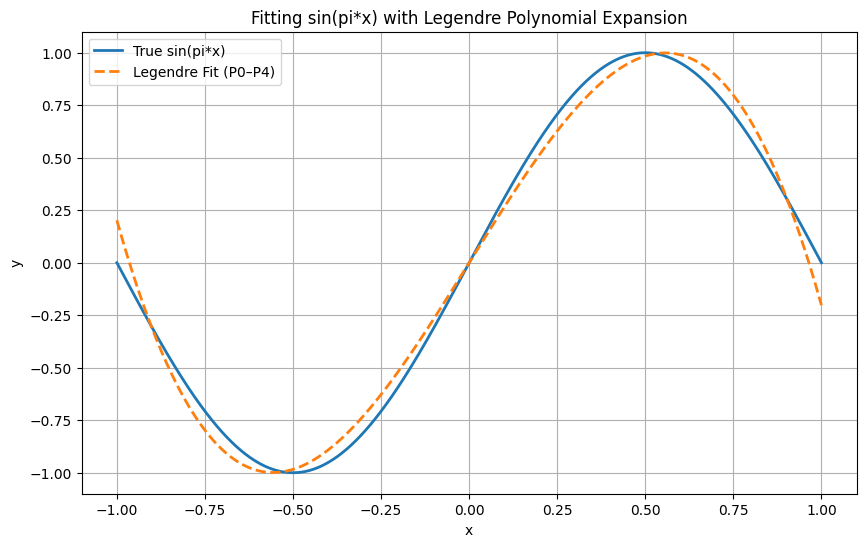

In [ ]:
import torch
import math
import matplotlib.pyplot as plt


dtype = torch.float
device = torch.device("cpu")

# training data
x = torch.linspace(-1, 1, 2000, device=device, dtype=dtype) 
y = torch.sin(math.pi * x) 

#Legendre polynomial functions
def P0(x): return torch.ones_like(x)
def P1(x): return x
def P2(x): return 0.5 * (3 * x**2 - 1)
def P3(x): return 0.5 * (5 * x**3 - 3 * x)
def P4(x): return 0.125 * (35 * x**4 - 30 *x**2 + 3)

def legendre_features(x):
    return torch.stack([P0(x), P1(x), P2(x), P3(x), P4(x)], dim=1)

X = legendre_features(x)  

coeffs = torch.randn(5, device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-3
num_epochs = 50000

# Training loop
for t in range(num_epochs):
    # Compute predicted y = X @ coeffs
    y_pred = X @ coeffs

    # Loss = sum of squared errors
    loss = (y_pred - y).pow(2).mean()

    # Print progress
    if t % 500 == 0:
        print(f"Epoch {t}/{num_epochs}, Loss = {loss.item():.6f}")

    loss.backward()

    # Gradient descent update
    with torch.no_grad():
        coeffs -= learning_rate * coeffs.grad
        coeffs.grad = None

for i, c in enumerate(coeffs):
    print(f"a{i} = {c.item():.6f}")


y_pred = X @ coeffs

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(x.cpu(), y.cpu(), label="True sin(pi*x)", linewidth=2)
plt.plot(x.cpu(), y_pred.detach().cpu(), "--", label="Legendre Fit (P0–P4)", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Fitting sin(pi*x) with Legendre Polynomial Expansion")
plt.legend()
plt.grid(True)
plt.show()



-------Analytical Legendre Coefficients ---------
a0 = 0.000000
a1 = 0.954929
a2 = -0.000000
a3 = -1.158244
a4 = -0.000000
a5 = 0.219287
Epoch 0: Loss = 0.827975
Epoch 500: Loss = 0.026495
Epoch 1000: Loss = 0.002532
Epoch 1500: Loss = 0.000323

=== Comparison of Coefficients ===
n=0: Analytic=0.000000, Gradient=0.000002, Diff=1.65e-06
n=1: Analytic=0.954929, Gradient=0.954934, Diff=5.36e-06
n=2: Analytic=-0.000000, Gradient=0.000093, Diff=9.26e-05
n=3: Analytic=-1.158244, Gradient=-1.153604, Diff=4.64e-03
n=4: Analytic=-0.000000, Gradient=-0.003035, Diff=3.04e-03
n=5: Analytic=0.219287, Gradient=0.198529, Diff=2.08e-02


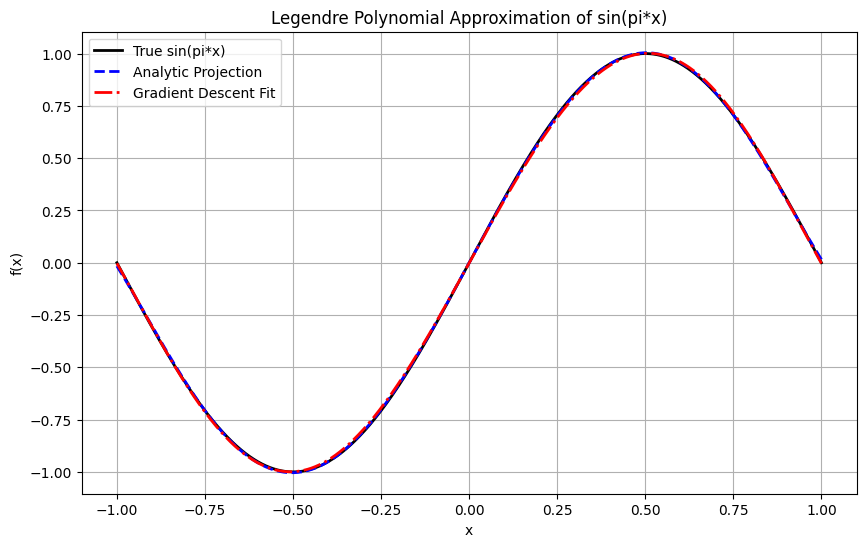

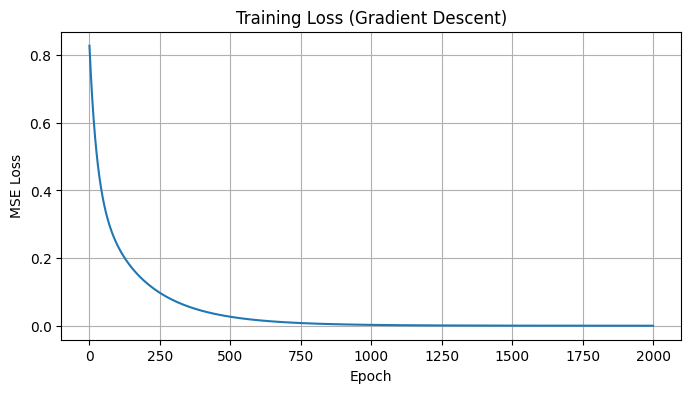

In [12]:
import torch
import math
import matplotlib.pyplot as plt


#  Legendre polynomials
def legendre_polynomials(x, N):
    """
    Legendre polynomials P0, P1, ..., PN for input tensor x.
    Uses the recurrence relation:
        (n+1) P_{n+1}(x) = (2n+1)x P_n(x) - n P_{n-1}(x)
    """
    P = [torch.ones_like(x), x]
    for n in range(1, N):
        Pn1 = ((2*n+1)*x*P[n] - n*P[n-1]) / (n+1)
        P.append(Pn1)
    return torch.stack(P[:N+1], dim=1)


device = torch.device("cpu")
x = torch.linspace(-1, 1, 2000, device=device)
f = torch.sin(math.pi * x)  # target function

N = 5  # Legendre polynomial order
P = legendre_polynomials(x, N)

# Analytical coefficients using orthogonal projection
coeffs_analytic = []
for n in range(N+1):
    an = (2*n + 1)/2 * torch.trapz(f * P[:, n], x)
    coeffs_analytic.append(an.item())
    

print("\n-------Analytical Legendre Coefficients ---------")
for n, a in enumerate(coeffs_analytic):
    print(f"a{n} = {a:.6f}")

# analytic approximation
y_analytic = sum(a * P[:, n] for n, a in enumerate(coeffs_analytic))


coeffs = torch.randn(N+1, device=device, requires_grad=True)
learning_rate = 1e-2
num_epochs = 2000
losses = []

for t in range(num_epochs):
    y_pred = P @ coeffs
    loss = (y_pred - f).pow(2).mean()
    losses.append(loss.item())

    # Backpropagation
    loss.backward()

    # Gradient descent step
    with torch.no_grad():
        coeffs -= learning_rate * coeffs.grad
        coeffs.grad = None

    if t % 500 == 0:
        print(f"Epoch {t}: Loss = {loss.item():.6f}")

# learned approximation
y_grad = (P @ coeffs).detach()

# analytical vs learned coeffs
print("\n=== Comparison of Coefficients ===")
for n, (a_proj, a_grad) in enumerate(zip(coeffs_analytic, coeffs.detach().cpu().numpy())):
    diff = abs(a_proj - a_grad)
    print(f"n={n}: Analytic={a_proj:.6f}, Gradient={a_grad:.6f}, Diff={diff:.2e}")

plt.figure(figsize=(10, 6))
plt.plot(x.cpu(), f.cpu(), 'k', label='True sin(pi*x)', linewidth=2)
plt.plot(x.cpu(), y_analytic.cpu(), 'b--', label='Analytic Projection', linewidth=2)
plt.plot(x.cpu(), y_grad.cpu(), 'r-.', label='Gradient Descent Fit', linewidth=2)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Legendre Polynomial Approximation of sin(pi*x)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss (Gradient Descent)")
plt.grid(True)
plt.show()


Epoch 0: Loss = 1.391348
Epoch 500: Loss = 0.036073
Epoch 1000: Loss = 0.002985
Epoch 1500: Loss = 0.000379
Epoch 2000: Loss = 0.000070
Epoch 2500: Loss = 0.000027
Epoch 3000: Loss = 0.000020
Epoch 3500: Loss = 0.000019
Epoch 4000: Loss = 0.000019
Epoch 4500: Loss = 0.000019
Epoch 5000: Loss = 0.000019
Epoch 5500: Loss = 0.000019
Epoch 6000: Loss = 0.000019
Epoch 6500: Loss = 0.000019
Epoch 7000: Loss = 0.000019
Epoch 7500: Loss = 0.000019
Epoch 8000: Loss = 0.000019
Epoch 8500: Loss = 0.000019
Epoch 9000: Loss = 0.000019
Epoch 9500: Loss = 0.000019


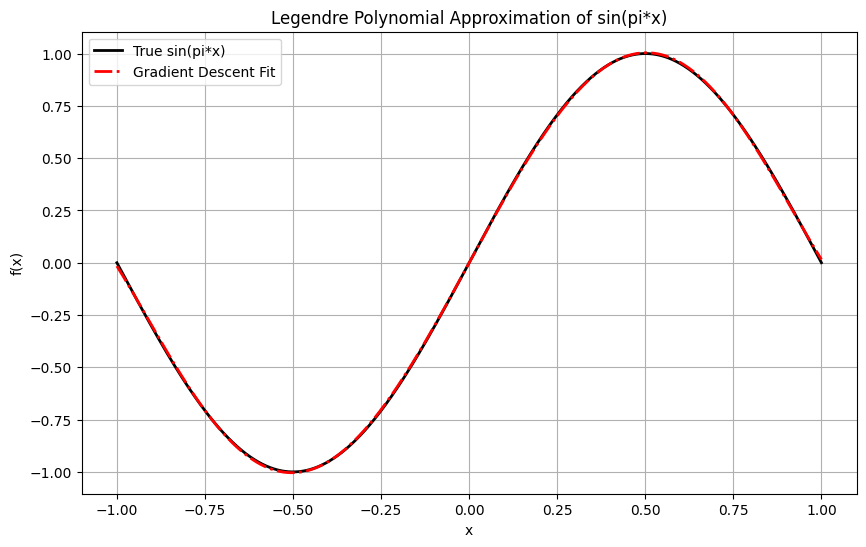

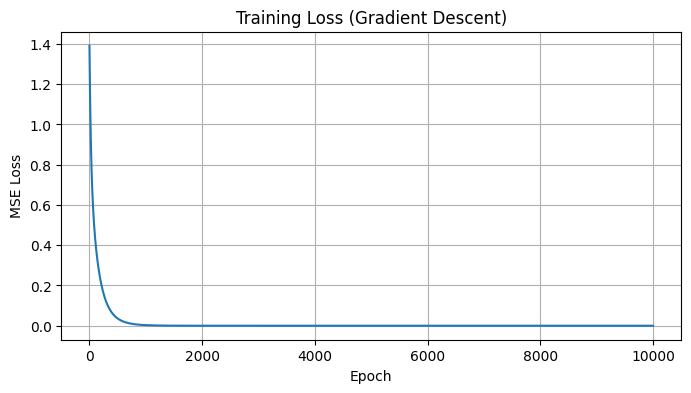

In [22]:
import torch
import math
import matplotlib.pyplot as plt


#  Legendre polynomials
def legendre_polynomials(x, N):
    """
    Legendre polynomials P0, P1, ..., PN for input tensor x.
    Uses the recurrence relation:
        (n+1) P_{n+1}(x) = (2n+1)x P_n(x) - n P_{n-1}(x)
    """
    P = [torch.ones_like(x), x]
    for n in range(1, N):
        Pn1 = ((2*n+1)*x*P[n] - n*P[n-1]) / (n+1)
        P.append(Pn1)
    return torch.stack(P[:N+1], dim=1)


f = torch.sin(math.pi * x)  # target 
N = 5


def pytorch_app(f,N):
    device = torch.device("cpu")
    x = torch.linspace(-1, 1, 2000, device=device)
  
    P = legendre_polynomials(x, N)
    coeffs = torch.randn(N+1, device=device, requires_grad=True)
    learning_rate = 1e-2
    num_epochs = 10000
    losses = []

    for t in range(num_epochs):
        y_pred = P @ coeffs
        loss = (y_pred - f).pow(2).mean()
        losses.append(loss.item())

        # Backpropagation
        loss.backward()

        # Gradient descent step
        with torch.no_grad():
            coeffs -= learning_rate * coeffs.grad
            coeffs.grad = None

        if t % 500 == 0:
            print(f"Epoch {t}: Loss = {loss.item():.6f}")

    # learned approximation
    y_grad = (P @ coeffs).detach()



    plt.figure(figsize=(10, 6))
    plt.plot(x.cpu(), f.cpu(), 'k', label='True sin(pi*x)', linewidth=2)
    plt.plot(x.cpu(), y_grad.cpu(), 'r-.', label='Gradient Descent Fit', linewidth=2)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title("Legendre Polynomial Approximation of sin(pi*x)")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 4))
    plt.plot(losses)
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.title("Training Loss (Gradient Descent)")
    plt.grid(True)
    plt.show()
pytorch_app(f,N)
    


0.21928668022155762